In [1]:
cd ..

/home/jonas_h/ch4_py/notebooks/Time Series Analysis/dlm_helper


In [2]:
import statsmodels.api as sm
import numpy as np

import dlmhelper.data
import dlmhelper.tools

In [3]:
dataset = sm.datasets.nile.load()

In [4]:
print(sm.datasets.nile.TITLE)

Nile River flows at Ashwan 1871-1970


In [5]:
dataset.data

,year,volume
0,1871.0,1120.0
1,1872.0,1160.0
2,1873.0,963.0
3,1874.0,1210.0
4,1875.0,1160.0
...,...,...
95,1966.0,746.0
96,1967.0,919.0
97,1968.0,718.0
98,1969.0,714.0


Now we create a time series object from this data using the following inputs:

- **time & data** : provide the data with corresponding time values
- **product_type** : allows to save some identifier with the data
- **time_unit** : the time unit declares what a single time step corresponds to
- **reference_time** : the reference time in this case is the year 0

Alternatively we could pass an array of numpy.datetime64 values to the constructor and only declare the time_unit (since the reference time is already included in the numpy.datetime64 objects):
- **dlmhelper.data.TimeSeries(data, time64 = time64,...)**

In [6]:
time = np.asarray(dataset.data.year)
data = np.asarray(dataset.data.volume)

product_type="Nile_Flows_Ashwan"
time_unit = "year"
reference_time = np.datetime64('0000-01-01')

In [7]:
#Uncomment to see the docstring for TimeSeries
#?dlmhelper.data.TimeSeries

In [8]:
timeseries = dlmhelper.data.TimeSeries(data, time = time, time_unit=time_unit, reference_time= reference_time, product_type=product_type)

The timeseries can be quickly plotted

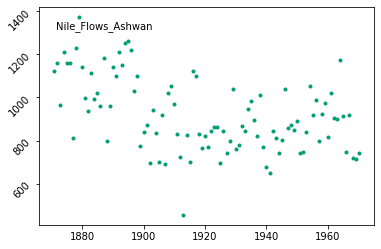

In [9]:
_fig, _ax = timeseries.plot()

Next we perform a single dynamic linear fit on the time series

In [10]:
result = dlmhelper.tools.dlm_fit(timeseries, "Nile_fit_test",level=True, variable_level=False,trend=True, variable_trend=True,
                    seasonal=False, autoregressive=None, irregular=True
                       )

In [11]:
#Uncomment to see the docstring for dlm_fit
#?dlmhelper.tools.dlm_fit

We can quicky visualize an overview of the results

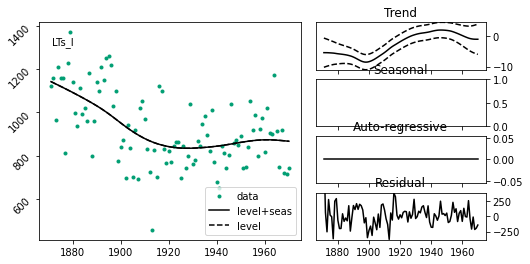

In [12]:
fig = result.plot_summary(figsize=(8,4))

It is also possible to perform an ensemble fit on the data using a single command.

We vary the variability of the trend and the inclusion of an irregular or autoregressive component

In [13]:
seasonal = [False]
variable_trend = [True, False]
autoregressive = [None,1]
irregular = [True, False]

In [14]:
result_list = dlmhelper.tools.dlm_ensemble(timeseries, "Nile_ensemble_test",
                                           seasonal=seasonal, variable_trend = variable_trend,
                                           autoregressive=autoregressive, irregular=irregular)

/home/jonas_h/ch4_py/lib/python3.8/site-packages/statsmodels/tsa/statespace/structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


The results can be quickly listed using the **summary()** method

In [15]:
result_list.summary()

| Model    | converged   |     aic |       ll |         ssr |     mse |        cov_level |   cov_trend |   cov_seas |    cov_ar |   cv_amse |   agg |
|:---------|:------------|--------:|---------:|------------:|--------:|-----------------:|------------:|-----------:|----------:|----------:|------:|
| LTs_A1   | True        | 1262.3  | -628.149 | 2.21447e+06 | 22596.6 |   1238.67        |    7.37248  |          0 |   1238.67 |       nan |   nan |
| LT_A1_I  | True        | 1263.12 | -628.561 | 2.22819e+06 | 22736.6 |   1937.13        |    1.12662  |          0 |   5423.81 |       nan |   nan |
| LT_A1    | True        | 1264.04 | -630.021 | 2.30372e+06 | 23507.3 |   1033.71        |    0.62355  |          0 |   1033.71 |       nan |   nan |
| LTs_A1_I | True        | 1267.71 | -629.856 | 2.26672e+06 | 23129.8 | 818056           |   18.1814   |          0 | 820269    |       nan |   nan |
| LTs_I    | True        | 1268.4  | -632.2   | 2.37133e+06 | 24197.3 |    808.834       |    8.4365

The results can be quickly plotted using the **plot_summary()** method

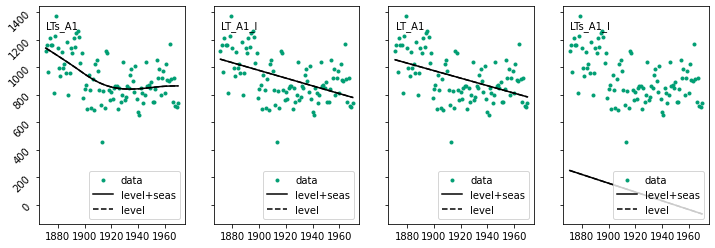

In [16]:
result_list.plot_summary(sort="aic", num=4, figsize=(12,4))